### Image processing

In [1]:
import imageio
import os
import pydot
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [2]:
import os
import imageio
import numpy as np
import rasterio

# Define your preprocessing function
def preprocess_imagery(path):
    '''
    Pre process satellite imagery. We check for nans in the composite images,
    and then we load them into the [0,1] range.
    Input: TIF files downloaded from GEE (224x224x7)
    '''
    # Reading image
    path = str(path).strip('b').strip("'")
    image = (imageio.imread(path))
    """if np.sum(np.isnan(image)) > 0:
        # Taking the mean of the image, per channel
        mean = np.nanmean(image, axis=(0, 1))
        # Replacing NaN with per channel mean
        replacement = np.isnan(image) * mean
        image[np.isnan(image)] = replacement[np.isnan(image)]  
        nan_channels = np.all(np.isnan(image), axis=(0, 1))
        # Replacing NaN with 0 where all values in a channel are NaN
        image[:, :, nan_channels] = np.nan_to_num(image[:, :, nan_channels])
    # Scale the image to [0, 1] range
    image = image / 255"""
    return image
"""
# Path to the directory containing the images
directory_path = "../GEE_Images"

for filename in os.listdir(directory_path):
    if filename.endswith(".tif"):  # Ensure you're only processing .tif files
        file_path = os.path.join(directory_path, filename)
        # Process the image
        processed_image = preprocess_imagery(file_path)
        # Save the processed image back to the same path
        with rasterio.open(file_path, 'w', driver='GTiff', height=processed_image.shape[1], width=processed_image.shape[2], count=processed_image.shape[0], dtype=processed_image.dtype) as dst:
            dst.write(processed_image)


print("All images processed and saved successfully.")
"""

'\n# Path to the directory containing the images\ndirectory_path = "../GEE_Images"\n\nfor filename in os.listdir(directory_path):\n    if filename.endswith(".tif"):  # Ensure you\'re only processing .tif files\n        file_path = os.path.join(directory_path, filename)\n        # Process the image\n        processed_image = preprocess_imagery(file_path)\n        # Save the processed image back to the same path\n        with rasterio.open(file_path, \'w\', driver=\'GTiff\', height=processed_image.shape[1], width=processed_image.shape[2], count=processed_image.shape[0], dtype=processed_image.dtype) as dst:\n            dst.write(processed_image)\n\n\nprint("All images processed and saved successfully.")\n'

In [ ]:
""" def preprocess_imagery(path):
    '''
    Pre process satellite imagery. We check for nans in the composite images,
    and then we load them into the [0,1] range.
    Input: TIF files downloaded from GEE (224x224x6)
    '''
    #reading image
    path=str(path).strip('b').strip("'")
    image=imageio.imread(path)
    if np.sum(np.isnan(image))>0:
        #print(str(np.sum(np.isnan(image)))+"nans found")
        #taking the mean of the image, per channel
        mean=np.nanmean(image,axis=(0,1))
        #replacing NaN with per channel mean
        replacement=np.isnan(image)*mean
        image[np.isnan(image)]=replacement[np.isnan(image)]  
        #print(str(np.sum(np.isnan(image)))+"nans found")
        nan_channels = np.all(np.isnan(image), axis=(0, 1))
        # Replacing NaN with 0 where all values in a channel are NaN
        image[:, :, nan_channels] = np.nan_to_num(image[:, :, nan_channels])
        image=image/255
    return image """

In [3]:
image_files = [f for f in os.listdir("../GEE_Images")]
len(image_files)

51782

In [31]:
"""import os
import pandas as pd
from datetime import timedelta

# Convertir la columna 'Date' a tipo datetime
df = pd.read_csv('processed_data.csv')
df['Date'] = pd.to_datetime(df['Date'])

image_info = []
for image in image_files:
    name, _ = os.path.splitext(image)
    image_info.append(['_'.join(name.split(' ')[0].split('_')[:-1]), name.split(' ')[0].split('_')[-1]])

mp10_0 = []
mp10_1 = []
mp10_2 = []
a = 0
image_files_0 = []
image_files_1 = []
image_files_2 = []

for info in image_info:
    # Convertir la fecha del string a datetime
    image_date = pd.to_datetime(info[1])

    # Filtrar los datos en un rango de 3 días antes y 3 días después
    date_range = (df['Date'] >= image_date - timedelta(days=3)) & (df['Date'] <= image_date + timedelta(days=3))
    value = df[(df['station'] == info[0]) & date_range]

    # Promediar los valores de mp10
    avg_mp10 = value['mp10'].mean()

    if value['region'].values[0] == 0:
        mp10_0.append(avg_mp10)
        image_files_0.append(image_files[a])
    elif value['region'].values[0] == 1:
        mp10_1.append(avg_mp10)
        image_files_1.append(image_files[a])
    else:
        mp10_2.append(avg_mp10)
        image_files_2.append(image_files[a])
    
    a += 1
"""

KeyboardInterrupt: 

In [7]:
"""with open("mp10_0_avg.txt", "w") as f:
  for value in mp10_0:
    f.write(str(value) + "\n")
with open("mp10_1_avg.txt", "w") as f:
  for value in mp10_1:
    f.write(str(value) + "\n")
with open("mp10_2_avg.txt", "w") as f:
  for value in mp10_2:
    f.write(str(value) + "\n")
with open("image_list_0.txt", "w") as f:
  for value in image_files_0:
    f.write(str(value) + "\n")
with open("image_list_1.txt", "w") as f:
  for value in image_files_1:
    f.write(str(value) + "\n")
with open("image_list_2.txt", "w") as f:
  for value in image_files_2:
    f.write(str(value) + "\n")
    """

In [4]:
with open('mp10_0_avg.txt', 'r') as f:
  mp100 = [float(line.strip()) for line in f]
mp100=np.array(mp100)
with open('mp10_1_avg.txt', 'r') as f:
  mp101 = [float(line.strip()) for line in f]
mp101=np.array(mp101)
with open('mp10_2_avg.txt', 'r') as f:
  mp102 = [float(line.strip()) for line in f]
mp102=np.array(mp102)

In [7]:
df0=pd.DataFrame(mp100,columns=['MP10'])
df01=pd.DataFrame(mp101,columns=['MP10'])
df02=pd.DataFrame(mp102,columns=['MP10'])

<Axes: ylabel='Count'>

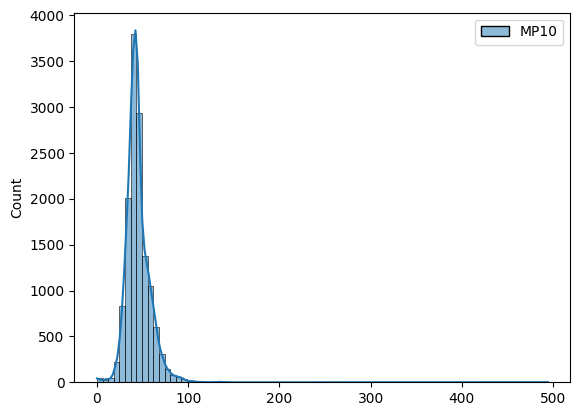

In [7]:
import seaborn as sns
sns.histplot(df0,kde=True,bins=80)

<Axes: ylabel='Count'>

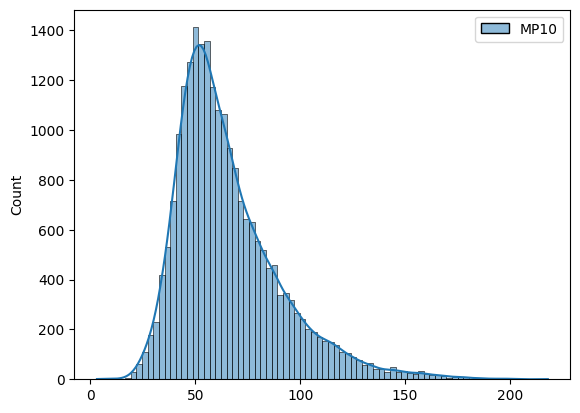

In [8]:
sns.histplot(df01,kde=True,bins=80)

<Axes: ylabel='Count'>

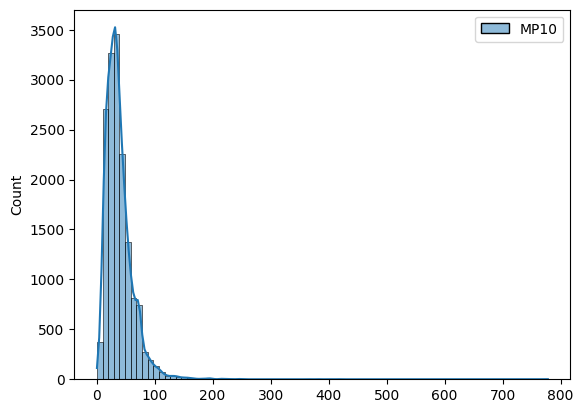

In [9]:
sns.histplot(df02,kde=True,bins=80)

In [21]:
with open('image_list_0.txt', 'r') as f:
  image_files = [str(line.strip()) for line in f]
with open('image_list_1.txt', 'r') as f:
  image_files2=[str(line.strip()) for line in f]
  
with open('image_list_2.txt', 'r') as f:
  image_files3=[str(line.strip()) for line in f]

In [22]:
for a in image_files2:
    image_files.append(a)
for a in image_files3:
    image_files.append(a)

In [23]:
#min max scaling
mp10=np.concatenate((np.concatenate((mp100,mp101)),mp102))
min_val = np.min(mp10)
max_val = np.max(mp10)
mp10 = (mp10 - min_val) / (max_val - min_val)

In [12]:
df=pd.DataFrame(mp10)

In [24]:
df.describe()

,0
count,51782.000000
mean,0.066961
std,0.033942
min,0.000000
25%,0.046749
50%,0.060775
75%,0.081297
max,1.000000


<Axes: ylabel='Count'>

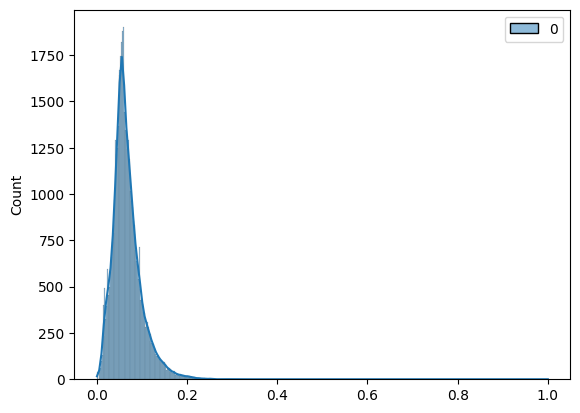

In [14]:
import seaborn as sns
sns.histplot(df,kde=True)

### Model using one NN 224,224,6 

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense, Dropout

def build_model():
    # Crear el modelo secuencial
    model = Sequential()

    # Añadir la capa de convolución 2D
    model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 6)))

    # Añadir la capa de Average Pooling
    model.add(AveragePooling2D(pool_size=(2, 2)))
    # Añadir la capa de convolución 2D
    model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))

    # Añadir la capa de Average Pooling
    model.add(AveragePooling2D(pool_size=(2, 2)))
    # Añadir la capa de convolución 2D
    model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))

    # Añadir la capa de Average Pooling
    model.add(AveragePooling2D(pool_size=(2, 2)))
    model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))

    # Añadir la capa de Average Pooling
    model.add(AveragePooling2D(pool_size=(2, 2)))

    # Aplanar la salida de la capa de pooling
    model.add(Flatten())

    # Añadir una capa densa
    model.add(Dense(units=128, activation='relu'))

    # Añadir la capa de Dropout
    model.add(Dropout(rate=0.5))

    # Añadir la capa de salida con activación lineal
    model.add(Dense(units=1, activation='linear'))
    return model


model = build_model()

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_squared_error','mean_absolute_percentage_error'])

# Resumen del modelo
model.summary()


c:\Users\benja\anaconda3\envs\ee\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 16)   │           880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 111, 111, 16)   │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 54, 54, 32)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_2             │ (None, 26, 26, 32)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_3             │ (None, 12, 12, 32)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 614,097 (2.34 MB)

 Trainable params: 614,097 (2.34 MB)

 Non-trainable params: 0 (0.00 B)

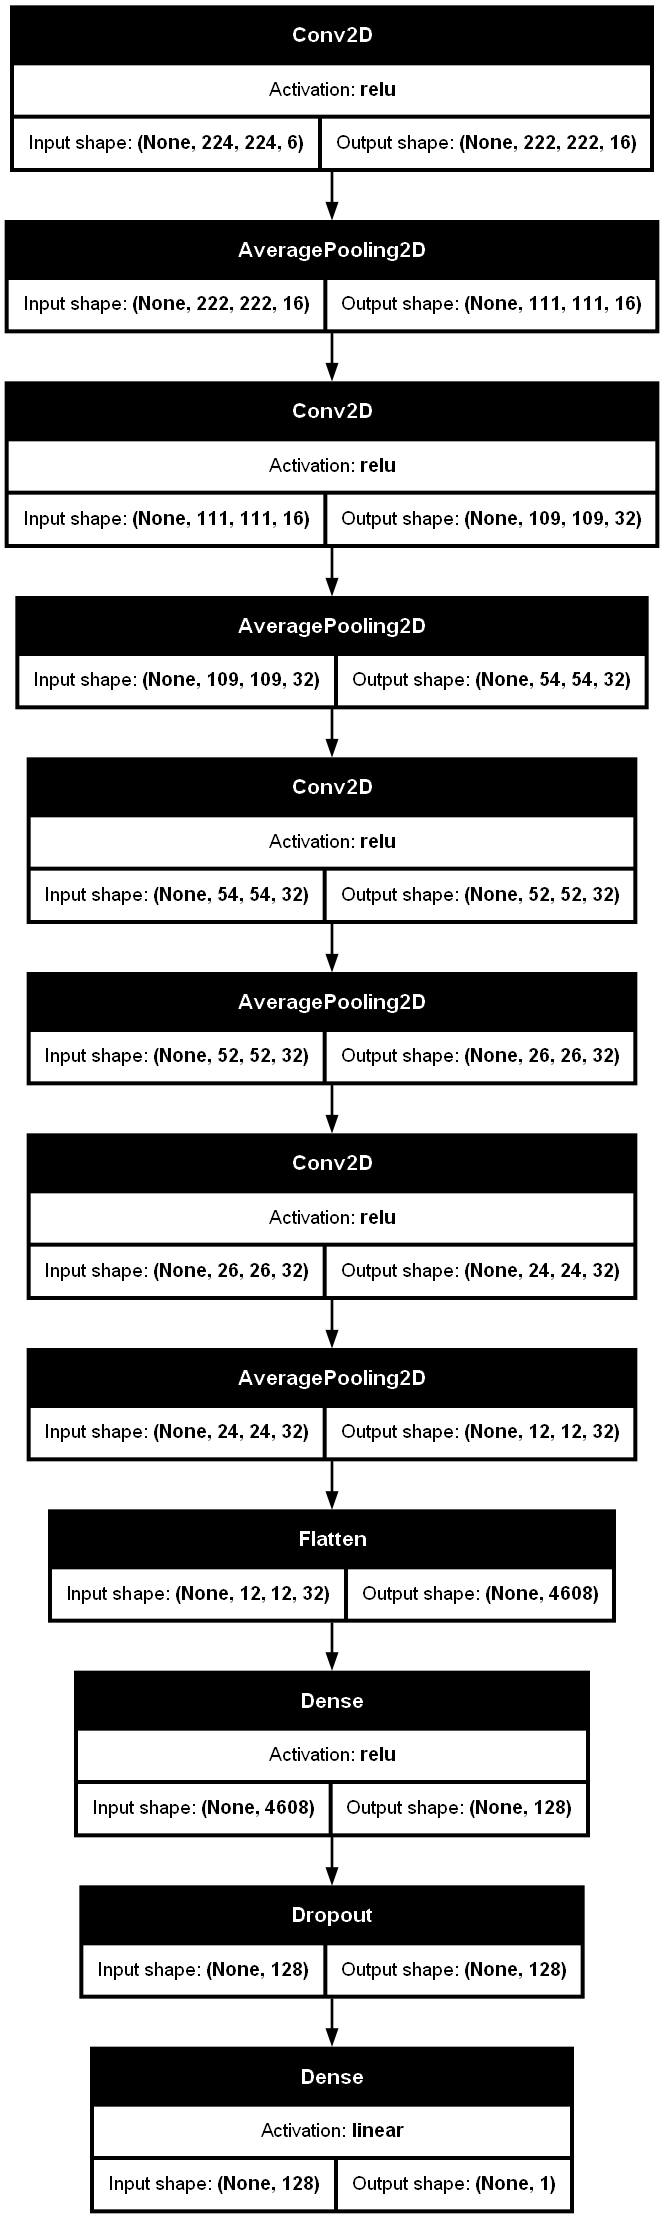

In [11]:
from keras.utils import plot_model
# Just showing all possible argument for newcomer.  
tf.keras.utils.plot_model(
    model,                      # here is the trick (for now)
    to_file='model.png', dpi=96,              # saving  
    show_shapes=True, show_layer_names=False,  # show shapes and layer name
    expand_nested=False, show_layer_activations=True                      # will show nested block
)

In [25]:

for a in range(len(image_files)):
    image_files[a]="../GEE_Images/"+image_files[a]
train_image_files, test_image_files, train_mp10, test_mp10 = train_test_split(
    image_files, mp10, test_size=0.2, random_state=42)


In [26]:
def data_generator(image_files, lista):
    i=0
    for file in image_files:
        mp10=tf.convert_to_tensor(lista[i],dtype=tf.float32)
        i+=1
        image = preprocess_imagery(file)
        image=tf.convert_to_tensor(image, dtype=tf.float32)
        yield image, mp10

# Crear el Dataset
def create_dataset(image_files,lista, batch_size):
    dataset = tf.data.Dataset.from_generator(
        data_generator,
        args=[image_files, lista],
        output_signature=(
            tf.TensorSpec(shape=(224, 224, 6), dtype=tf.float32),
            tf.TensorSpec(shape=(), dtype=tf.float32)
        )
    )
    dataset = dataset.batch(batch_size)
    dataset = dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
    dataset=dataset.repeat()
    return dataset

In [27]:
train_image_files, validation_image_files, train_mp10, validation_mp10 = train_test_split(
    train_image_files, train_mp10, train_size=0.875, random_state=42)

In [28]:
epochs = 25
val_dataset=create_dataset(validation_image_files,validation_mp10,batch_size=50)
dataset=create_dataset(train_image_files,train_mp10,batch_size=50)
history=model.fit(dataset,epochs=epochs,batch_size=50,steps_per_epoch=len(train_image_files)//50,shuffle=True,validation_data=val_dataset,validation_steps=len(validation_image_files)//50)


Epoch 1/25


C:\Users\benja\AppData\Local\Temp\ipykernel_21872\1819445058.py:15: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = (imageio.imread(path))


724/724 ━━━━━━━━━━━━━━━━━━━━ 397s 547ms/step - loss: 0.3116 - mean_absolute_percentage_error: 100488.1328 - mean_squared_error: 5.2368 - val_loss: 0.0201 - val_mean_absolute_percentage_error: 45188.4258 - val_mean_squared_error: 8.6684e-04
Epoch 2/25
724/724 ━━━━━━━━━━━━━━━━━━━━ 391s 541ms/step - loss: 0.0191 - mean_absolute_percentage_error: 23251.8281 - mean_squared_error: 9.0060e-04 - val_loss: 0.0188 - val_mean_absolute_percentage_error: 48179.5820 - val_mean_squared_error: 7.6402e-04
Epoch 3/25
724/724 ━━━━━━━━━━━━━━━━━━━━ 387s 535ms/step - loss: 0.0181 - mean_absolute_percentage_error: 23120.5312 - mean_squared_error: 8.0185e-04 - val_loss: 0.0179 - val_mean_absolute_percentage_error: 50579.2070 - val_mean_squared_error: 6.9072e-04
Epoch 4/25
724/724 ━━━━━━━━━━━━━━━━━━━━ 384s 531ms/step - loss: 0.0174 - mean_absolute_percentage_error: 23945.1816 - mean_squared_error: 7.5270e-04 - val_loss: 0.0169 - val_mean_absolute_percentage_error: 50686.0117 - val_mean_squared_error: 6.4476e-0

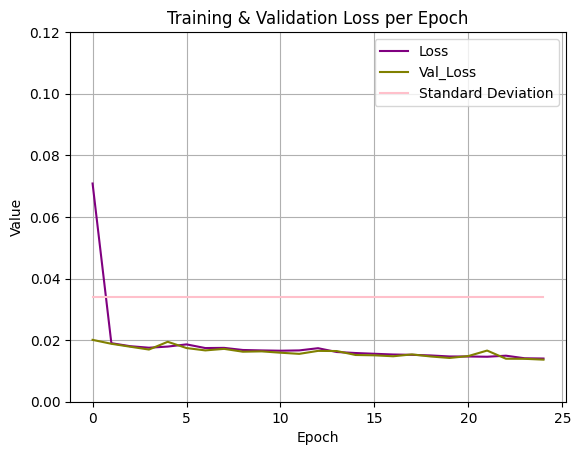

In [29]:
import matplotlib.pyplot as plt
s=[np.std(mp10)]*25
colors = ['b', 'g', 'r', 'c', 'm', 'y','k','orange', 'purple', 'brown', 'pink', 'lime', 'teal', 'gray', 'olive', 'navy']

    # Grafica los valores de loss
plt.plot(history.history['loss'],  color='purple',label='Loss')
plt.plot(history.history['val_loss'],color='olive',label='Val_Loss')
plt.plot(s,label='Standard Deviation',color='pink')
# Agrega etiquetas al gráfico
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.ylim(0,0.12)
plt.title('Training & Validation Loss per Epoch')
plt.legend()

plt.grid(True)
plt.savefig('val_loss_whole.png',format='png')
# Muestra el gráfico
plt.show()


In [30]:
def data_generator(image_files):
    i=0
    for file in image_files:
        i+=1
        image = preprocess_imagery(file)
        image=tf.convert_to_tensor(image, dtype=tf.float32)
        yield image

# Crear el Dataset
def create_dataset_test(image_files, batch_size):
    dataset = tf.data.Dataset.from_generator(
        data_generator,
        args=[image_files],
        output_signature=(
            tf.TensorSpec(shape=(224, 224, 6), dtype=tf.float32)
        )
    )
    dataset = dataset.batch(batch_size)
    dataset = dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
    dataset=dataset.repeat()
    return dataset
dataset_test=create_dataset_test(test_image_files,1)
predictions=model.predict(dataset_test,steps=len(test_image_files))


   17/10357 ━━━━━━━━━━━━━━━━━━━━ 1:08 7ms/step 

C:\Users\benja\AppData\Local\Temp\ipykernel_21872\1819445058.py:15: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = (imageio.imread(path))


10357/10357 ━━━━━━━━━━━━━━━━━━━━ 83s 8ms/step


In [32]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import numpy as np

# Calcular MAE
mae = mean_absolute_error(test_mp10, predictions)
mse= mean_squared_error(test_mp10, predictions)
# Calcular R-squared
r2 = r2_score(test_mp10, predictions)

# Calcular MAPE
def smape(y_true, y_pred):
    """
    Calcula el Symmetric Mean Absolute Percentage Error.
    """
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred) + 1e-6))

smape = smape(test_mp10, predictions)

# Imprimir las métricas
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R-squared: {r2}")
print(f"MAPE: {smape}%")

MAE: 0.013369762323993584
MSE: 0.0005488426345193683
R-squared: 0.5448592482331676
MAPE: 44.10163390492658%


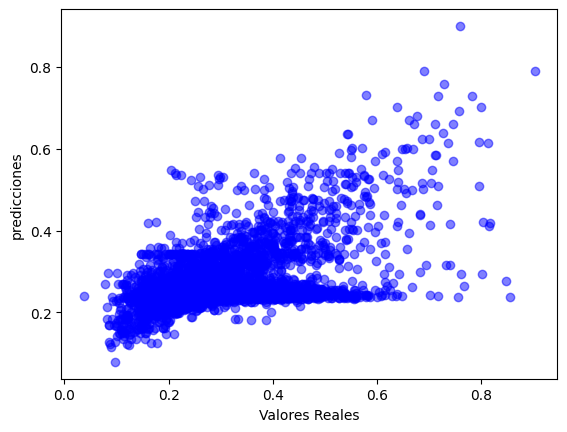

In [35]:
plt.scatter(test_mp10, predictions, color='blue', alpha=0.5)

plt.xlabel('Valores Reales')
plt.ylabel('predicciones')


plt.show()

In [50]:
residuos = []
for a in range(len(test_mp10)):
    residuos.append(float(test_mp10[a])-float(predictions[a]))

C:\Users\benja\AppData\Local\Temp\ipykernel_11676\1617754032.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  residuos.append(float(test_mp10[a])-float(predictions[a]))


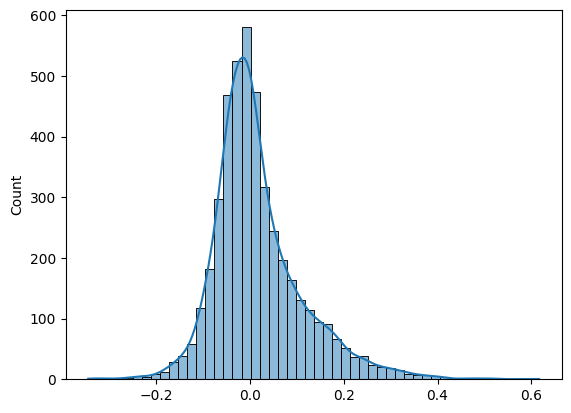

In [62]:
import seaborn as sns
sns.histplot(residuos,kde=True,bins=50)
plt.show()

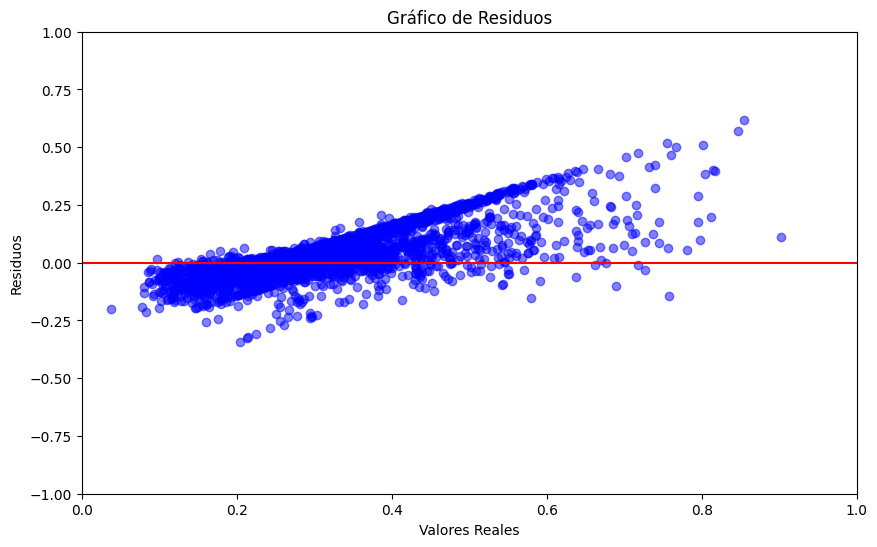

In [56]:
plt.figure(figsize=(10, 6))
plt.scatter(test_mp10, residuos, color='blue', alpha=0.5)
plt.hlines(y=0, xmin=0, xmax=1, color='red')
plt.xlabel('Valores Reales')
plt.ylabel('Residuos')
plt.xlim(0,1)
plt.ylim(-1,1)
plt.title('Gráfico de Residuos')
plt.show()

### For 6 NN with 224,224

In [12]:

def separar_imagen(imagen):
    """
    Separa una imagen con dimensiones (224, 224, 6) en 6 imágenes con dimensiones (224, 224, 1).

    Args:
    imagen (numpy.ndarray): Imagen original con dimensiones (224, 224, 6).

    Returns:
    tuple: Una tupla con 6 numpy.ndarrays, cada uno con dimensiones (224, 224, 1).
    """
    # Verificar que la imagen tenga las dimensiones correctas
    assert imagen.shape == (224, 224, 6), "La imagen debe tener dimensiones (224, 224, 6)"
    
    # Separar la imagen en 6 partes
    imagenes_separadas = tuple(imagen[:, :, i][:, :, np.newaxis] for i in range(6))
    
    return imagenes_separadas

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense, Dropout

def build_model_layer():
    # Crear el modelo secuencial
    model = Sequential()

    # Añadir la capa de convolución 2D
    model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu',input_shape=(224,224,1)))

    # Añadir la capa de Average Pooling
    model.add(AveragePooling2D(pool_size=(2, 2)))
    # Añadir la capa de convolución 2D
    model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))

    # Añadir la capa de Average Pooling
    model.add(AveragePooling2D(pool_size=(2, 2)))
    # Añadir la capa de convolución 2D
    model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))

    # Añadir la capa de Average Pooling
    model.add(AveragePooling2D(pool_size=(2, 2)))
    model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))

    # Añadir la capa de Average Pooling
    model.add(AveragePooling2D(pool_size=(2, 2)))

    # Aplanar la salida de la capa de pooling
    model.add(Flatten())

    # Añadir una capa densa
    model.add(Dense(units=128, activation='relu'))

    # Añadir la capa de Dropout
    model.add(Dropout(rate=0.5))

    # Añadir la capa de salida con activación lineal
    model.add(Dense(units=1, activation='linear'))
    return model

#### Global settings for the layered models

In [14]:
epochs = 15

#### Model for layer 0

In [15]:
model_0=build_model_layer()
# Compilar el modelo
model_0.compile(optimizer='adam', loss='mean_absolute_error')

# Resumen del modelo
model_0.summary()

/home/benjaxmen/miniconda3/envs/ee/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 222, 222, 16)   │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_4             │ (None, 111, 111, 16)   │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 109, 109, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_5             │ (None, 54, 54, 32)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 52, 52, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_6             │ (None, 26, 26, 32)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_7             │ (None, 12, 12, 32)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 613,377 (2.34 MB)

 Trainable params: 613,377 (2.34 MB)

 Non-trainable params: 0 (0.00 B)

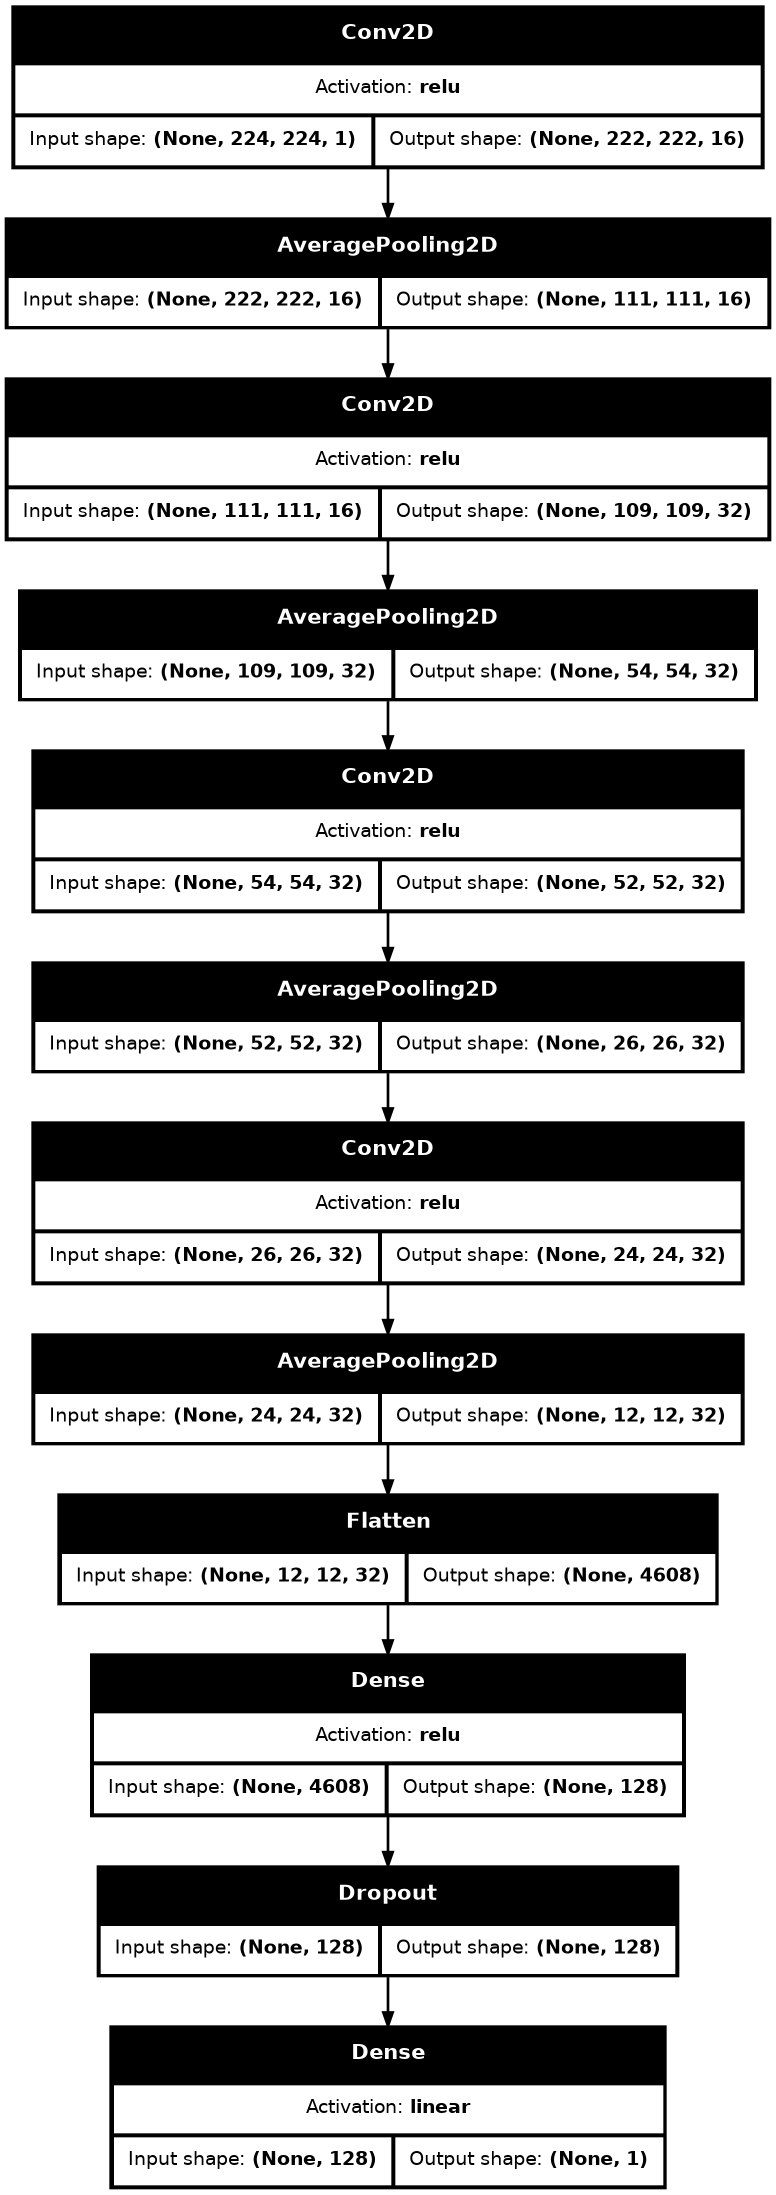

In [22]:
from keras.utils import plot_model
# Just showing all possible argument for newcomer.  
tf.keras.utils.plot_model(
    model_0,                      # here is the trick (for now)
    to_file='model_layered.png', dpi=96,              # saving  
    show_shapes=True, show_layer_names=False,  # show shapes and layer name
    expand_nested=False, show_layer_activations=True                      # will show nested block
)

In [16]:

images=[]
for imgs in image_files:
    images.append(tf.convert_to_tensor(separar_imagen(preprocess_imagery(imgs))[0],dtype=tf.float32))
images=np.array(images)
history_0=model_0.fit(images,mp10,epochs=15,batch_size=50,shuffle=True,validation_split=0.2)


/tmp/ipykernel_10927/3210126769.py:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image=imageio.imread(path)
2024-06-12 00:19:13.046874: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 3585376256 exceeds 10% of free system memory.


Epoch 1/15
358/358 ━━━━━━━━━━━━━━━━━━━━ 123s 341ms/step - loss: 32.1239 - val_loss: 0.0548
Epoch 2/15
358/358 ━━━━━━━━━━━━━━━━━━━━ 122s 342ms/step - loss: 0.0579 - val_loss: 0.0543
Epoch 3/15
358/358 ━━━━━━━━━━━━━━━━━━━━ 122s 342ms/step - loss: 0.0584 - val_loss: 0.0551
Epoch 4/15
358/358 ━━━━━━━━━━━━━━━━━━━━ 122s 341ms/step - loss: 0.0585 - val_loss: 0.0540
Epoch 5/15
358/358 ━━━━━━━━━━━━━━━━━━━━ 122s 341ms/step - loss: 0.0580 - val_loss: 0.0554
Epoch 6/15
358/358 ━━━━━━━━━━━━━━━━━━━━ 123s 342ms/step - loss: 0.0571 - val_loss: 0.0543
Epoch 7/15
358/358 ━━━━━━━━━━━━━━━━━━━━ 122s 341ms/step - loss: 0.0574 - val_loss: 0.0555
Epoch 8/15
358/358 ━━━━━━━━━━━━━━━━━━━━ 123s 342ms/step - loss: 0.0577 - val_loss: 0.0549
Epoch 9/15
358/358 ━━━━━━━━━━━━━━━━━━━━ 122s 342ms/step - loss: 0.0575 - val_loss: 0.0549
Epoch 10/15
358/358 ━━━━━━━━━━━━━━━━━━━━ 123s 342ms/step - loss: 0.0573 - val_loss: 0.0548
Epoch 11/15
358/358 ━━━━━━━━━━━━━━━━━━━━ 123s 343ms/step - loss: 0.0572 - val_loss: 0.0550
Epoch 1

#### Model for layer 1

In [17]:
model_1=build_model_layer()
# Compilar el modelo
model_1.compile(optimizer='adam', loss='mean_absolute_error')

In [18]:
images=[]
for imgs in image_files:
    images.append(tf.convert_to_tensor(separar_imagen(preprocess_imagery(imgs))[1],dtype=tf.float32))
images=np.array(images)
history_1=model_1.fit(images,mp10,epochs=15,batch_size=50,shuffle=True,validation_split=0.2)


/tmp/ipykernel_10927/3210126769.py:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image=imageio.imread(path)


Epoch 1/15
358/358 ━━━━━━━━━━━━━━━━━━━━ 122s 339ms/step - loss: 209.5569 - val_loss: 0.0623
Epoch 2/15
358/358 ━━━━━━━━━━━━━━━━━━━━ 122s 340ms/step - loss: 0.0627 - val_loss: 0.0542
Epoch 3/15
358/358 ━━━━━━━━━━━━━━━━━━━━ 122s 340ms/step - loss: 0.0589 - val_loss: 0.0553
Epoch 4/15
358/358 ━━━━━━━━━━━━━━━━━━━━ 122s 341ms/step - loss: 0.0585 - val_loss: 0.0541
Epoch 5/15
358/358 ━━━━━━━━━━━━━━━━━━━━ 122s 342ms/step - loss: 0.0570 - val_loss: 0.0566
Epoch 6/15
358/358 ━━━━━━━━━━━━━━━━━━━━ 122s 342ms/step - loss: 0.0579 - val_loss: 0.0550
Epoch 7/15
358/358 ━━━━━━━━━━━━━━━━━━━━ 122s 342ms/step - loss: 0.0572 - val_loss: 0.0560
Epoch 8/15
358/358 ━━━━━━━━━━━━━━━━━━━━ 122s 342ms/step - loss: 0.0571 - val_loss: 0.0566
Epoch 9/15
358/358 ━━━━━━━━━━━━━━━━━━━━ 122s 342ms/step - loss: 0.0568 - val_loss: 0.0549
Epoch 10/15
358/358 ━━━━━━━━━━━━━━━━━━━━ 123s 343ms/step - loss: 0.0563 - val_loss: 0.0561
Epoch 11/15
358/358 ━━━━━━━━━━━━━━━━━━━━ 122s 342ms/step - loss: 0.0565 - val_loss: 0.0555
Epoch 

#### Model for layer 2

In [19]:
model_2=build_model_layer()
# Compilar el modelo
model_2.compile(optimizer='adam', loss='mean_absolute_error')

In [20]:
images=[]
for imgs in image_files:
    images.append(tf.convert_to_tensor(separar_imagen(preprocess_imagery(imgs))[2],dtype=tf.float32))
images=np.array(images)
history_2=model_2.fit(images,mp10,epochs=15,batch_size=50,shuffle=True,validation_split=0.2)

/tmp/ipykernel_10927/3210126769.py:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image=imageio.imread(path)


Epoch 1/15
358/358 ━━━━━━━━━━━━━━━━━━━━ 140s 344ms/step - loss: 21.9399 - val_loss: 0.0587
Epoch 2/15
358/358 ━━━━━━━━━━━━━━━━━━━━ 123s 344ms/step - loss: 0.0589 - val_loss: 0.0545
Epoch 3/15
358/358 ━━━━━━━━━━━━━━━━━━━━ 123s 344ms/step - loss: 0.0572 - val_loss: 0.0534
Epoch 4/15
358/358 ━━━━━━━━━━━━━━━━━━━━ 123s 344ms/step - loss: 0.0572 - val_loss: 0.0543
Epoch 5/15
358/358 ━━━━━━━━━━━━━━━━━━━━ 123s 345ms/step - loss: 0.0573 - val_loss: 0.0559
Epoch 6/15
358/358 ━━━━━━━━━━━━━━━━━━━━ 142s 345ms/step - loss: 0.0567 - val_loss: 0.0547
Epoch 7/15
358/358 ━━━━━━━━━━━━━━━━━━━━ 123s 345ms/step - loss: 0.0561 - val_loss: 0.0543
Epoch 8/15
358/358 ━━━━━━━━━━━━━━━━━━━━ 123s 344ms/step - loss: 0.0571 - val_loss: 0.0562
Epoch 9/15
358/358 ━━━━━━━━━━━━━━━━━━━━ 124s 345ms/step - loss: 0.0568 - val_loss: 0.0584
Epoch 10/15
358/358 ━━━━━━━━━━━━━━━━━━━━ 123s 345ms/step - loss: 0.0570 - val_loss: 0.0571
Epoch 11/15
358/358 ━━━━━━━━━━━━━━━━━━━━ 124s 345ms/step - loss: 0.0561 - val_loss: 0.0555
Epoch 1

#### Model for layer 3

In [21]:
model_3=build_model_layer()
# Compilar el modelo
model_3.compile(optimizer='adam', loss='mean_absolute_error')

In [22]:
images=[]
for imgs in image_files:
    images.append(tf.convert_to_tensor(separar_imagen(preprocess_imagery(imgs))[3],dtype=tf.float32))
images=np.array(images)
history_3=model_3.fit(images,mp10,epochs=15,batch_size=50,shuffle=True,validation_split=0.2)

/tmp/ipykernel_10927/3210126769.py:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image=imageio.imread(path)


Epoch 1/15
358/358 ━━━━━━━━━━━━━━━━━━━━ 125s 346ms/step - loss: 37.5953 - val_loss: 0.0548
Epoch 2/15
358/358 ━━━━━━━━━━━━━━━━━━━━ 123s 344ms/step - loss: 0.0583 - val_loss: 0.0558
Epoch 3/15
358/358 ━━━━━━━━━━━━━━━━━━━━ 123s 344ms/step - loss: 0.0580 - val_loss: 0.0544
Epoch 4/15
358/358 ━━━━━━━━━━━━━━━━━━━━ 123s 344ms/step - loss: 0.0572 - val_loss: 0.0537
Epoch 5/15
358/358 ━━━━━━━━━━━━━━━━━━━━ 123s 344ms/step - loss: 0.0569 - val_loss: 0.0561
Epoch 6/15
358/358 ━━━━━━━━━━━━━━━━━━━━ 123s 344ms/step - loss: 0.0561 - val_loss: 0.0551
Epoch 7/15
358/358 ━━━━━━━━━━━━━━━━━━━━ 124s 345ms/step - loss: 0.0567 - val_loss: 0.0552
Epoch 8/15
358/358 ━━━━━━━━━━━━━━━━━━━━ 123s 345ms/step - loss: 0.0570 - val_loss: 0.0550
Epoch 9/15
358/358 ━━━━━━━━━━━━━━━━━━━━ 123s 345ms/step - loss: 0.0569 - val_loss: 0.0554
Epoch 10/15
358/358 ━━━━━━━━━━━━━━━━━━━━ 124s 345ms/step - loss: 0.0561 - val_loss: 0.0547
Epoch 11/15
358/358 ━━━━━━━━━━━━━━━━━━━━ 123s 344ms/step - loss: 0.0565 - val_loss: 0.0554
Epoch 1

#### Model for layer 4

In [23]:
model_4=build_model_layer()
# Compilar el modelo
model_4.compile(optimizer='adam', loss='mean_absolute_error')

In [24]:
images=[]
for imgs in image_files:
    images.append(tf.convert_to_tensor(separar_imagen(preprocess_imagery(imgs))[4],dtype=tf.float32))
images=np.array(images)
history_4=model_4.fit(images,mp10,epochs=15,batch_size=50,shuffle=True,validation_split=0.2)

/tmp/ipykernel_10927/3210126769.py:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image=imageio.imread(path)


Epoch 1/15
358/358 ━━━━━━━━━━━━━━━━━━━━ 123s 342ms/step - loss: 166.3412 - val_loss: 0.0553
Epoch 2/15
358/358 ━━━━━━━━━━━━━━━━━━━━ 123s 342ms/step - loss: 0.1144 - val_loss: 0.0562
Epoch 3/15
358/358 ━━━━━━━━━━━━━━━━━━━━ 123s 344ms/step - loss: 0.0572 - val_loss: 0.0697
Epoch 4/15
358/358 ━━━━━━━━━━━━━━━━━━━━ 123s 344ms/step - loss: 0.8872 - val_loss: 0.0550
Epoch 5/15
358/358 ━━━━━━━━━━━━━━━━━━━━ 123s 344ms/step - loss: 0.0561 - val_loss: 0.0549
Epoch 6/15
358/358 ━━━━━━━━━━━━━━━━━━━━ 123s 344ms/step - loss: 0.1398 - val_loss: 0.0561
Epoch 7/15
358/358 ━━━━━━━━━━━━━━━━━━━━ 123s 343ms/step - loss: 0.0567 - val_loss: 0.0557
Epoch 8/15
358/358 ━━━━━━━━━━━━━━━━━━━━ 123s 343ms/step - loss: 0.0570 - val_loss: 0.0555
Epoch 9/15
358/358 ━━━━━━━━━━━━━━━━━━━━ 123s 343ms/step - loss: 0.0564 - val_loss: 0.0547
Epoch 10/15
358/358 ━━━━━━━━━━━━━━━━━━━━ 123s 343ms/step - loss: 0.0569 - val_loss: 0.0550
Epoch 11/15
358/358 ━━━━━━━━━━━━━━━━━━━━ 123s 344ms/step - loss: 0.0569 - val_loss: 0.0541
Epoch 

#### Model for layer 5

In [25]:
model_5=build_model_layer()
# Compilar el modelo
model_5.compile(optimizer='adam', loss='mean_absolute_error')


In [26]:
images=[]
for imgs in image_files:
    images.append(tf.convert_to_tensor(separar_imagen(preprocess_imagery(imgs))[5],dtype=tf.float32))
images=np.array(images)
history_5=model_5.fit(images,mp10,epochs=15,batch_size=50,shuffle=True,validation_split=0.2)

/tmp/ipykernel_10927/3210126769.py:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image=imageio.imread(path)


Epoch 1/15
358/358 ━━━━━━━━━━━━━━━━━━━━ 127s 343ms/step - loss: 16.6290 - val_loss: 0.1340
Epoch 2/15
358/358 ━━━━━━━━━━━━━━━━━━━━ 122s 342ms/step - loss: 0.0594 - val_loss: 0.0626
Epoch 3/15
358/358 ━━━━━━━━━━━━━━━━━━━━ 122s 342ms/step - loss: 0.0579 - val_loss: 0.0569
Epoch 4/15
358/358 ━━━━━━━━━━━━━━━━━━━━ 122s 342ms/step - loss: 0.0576 - val_loss: 0.0579
Epoch 5/15
358/358 ━━━━━━━━━━━━━━━━━━━━ 122s 342ms/step - loss: 0.0582 - val_loss: 0.0555
Epoch 6/15
358/358 ━━━━━━━━━━━━━━━━━━━━ 122s 341ms/step - loss: 0.0572 - val_loss: 0.0569
Epoch 7/15
358/358 ━━━━━━━━━━━━━━━━━━━━ 122s 342ms/step - loss: 0.0587 - val_loss: 0.0553
Epoch 8/15
358/358 ━━━━━━━━━━━━━━━━━━━━ 122s 342ms/step - loss: 0.0575 - val_loss: 0.0560
Epoch 9/15
358/358 ━━━━━━━━━━━━━━━━━━━━ 122s 342ms/step - loss: 0.0575 - val_loss: 0.0550
Epoch 10/15
358/358 ━━━━━━━━━━━━━━━━━━━━ 122s 342ms/step - loss: 0.0583 - val_loss: 0.0543
Epoch 11/15
358/358 ━━━━━━━━━━━━━━━━━━━━ 122s 342ms/step - loss: 0.0576 - val_loss: 0.0571
Epoch 1

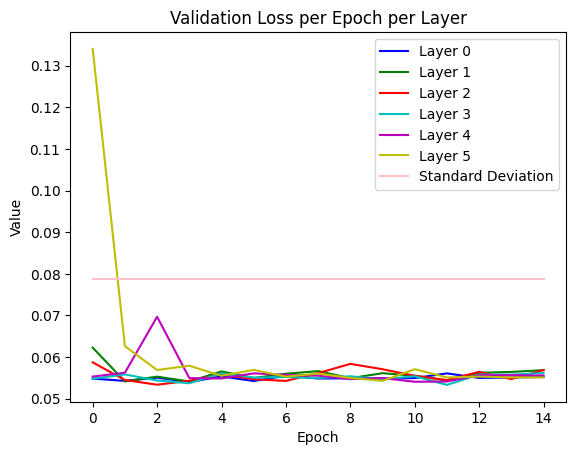

In [27]:
import matplotlib.pyplot as plt
colors = ['b', 'g', 'r', 'c', 'm', 'y','k','orange', 'purple', 'brown', 'pink', 'lime', 'teal', 'gray', 'olive', 'navy']
plt.plot(history_0.history['val_loss'], label='Layer 0', color=colors[0])
plt.plot(history_1.history['val_loss'], label='Layer 1', color=colors[1])
plt.plot(history_2.history['val_loss'], label='Layer 2', color=colors[2])
plt.plot(history_3.history['val_loss'], label='Layer 3', color=colors[3])
plt.plot(history_4.history['val_loss'], label='Layer 4', color=colors[4])
plt.plot(history_5.history['val_loss'], label='Layer 5', color=colors[5])
plt.plot(s,label='Standard Deviation',color='pink')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) 
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Validation Loss per Epoch per Layer')
plt.legend()
plt.savefig('val_loss_layered-comp.png',format='png')
plt.show()

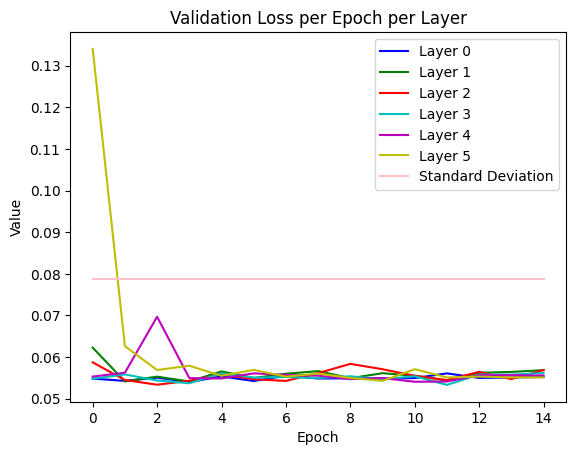

In [28]:
import matplotlib.pyplot as plt
colors = ['b', 'g', 'r', 'c', 'm', 'y','k','orange', 'purple', 'brown', 'pink', 'lime', 'teal', 'gray', 'olive', 'navy']
plt.plot(history_0.history['val_loss'], label='Layer 0', color=colors[0])
plt.plot(history_1.history['val_loss'], label='Layer 1', color=colors[1])
plt.plot(history_2.history['val_loss'], label='Layer 2', color=colors[2])
plt.plot(history_3.history['val_loss'], label='Layer 3', color=colors[3])
plt.plot(history_4.history['val_loss'], label='Layer 4', color=colors[4])
plt.plot(history_5.history['val_loss'], label='Layer 5', color=colors[5])
plt.plot()
plt.plot(s,label='Standard Deviation',color='pink')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) 
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Validation Loss per Epoch per Layer')
plt.legend()
plt.savefig('val_loss_layered.png',format='png')
plt.show()

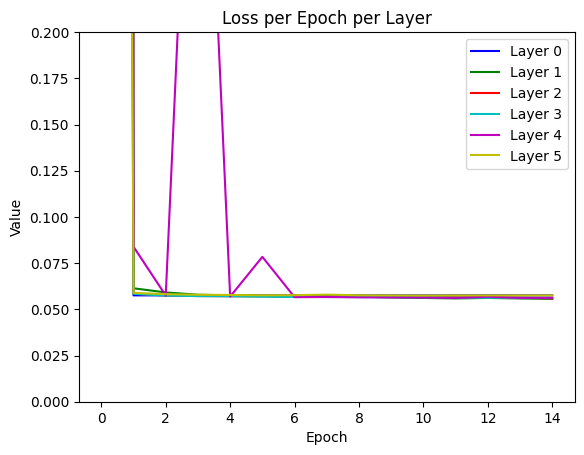

In [33]:
import matplotlib.pyplot as plt
colors = ['b', 'g', 'r', 'c', 'm', 'y','k','orange', 'purple', 'brown', 'pink', 'lime', 'teal', 'gray', 'olive', 'navy']
plt.plot(history_0.history['loss'], label='Layer 0', color=colors[0])
plt.plot(history_1.history['loss'], label='Layer 1', color=colors[1])
plt.plot(history_2.history['loss'], label='Layer 2', color=colors[2])
plt.plot(history_3.history['loss'], label='Layer 3', color=colors[3])
plt.plot(history_4.history['loss'], label='Layer 4', color=colors[4])
plt.plot(history_5.history['loss'], label='Layer 5', color=colors[5])
plt.xlabel('Epoch')
plt.ylim(0,0.2)
plt.ylabel('Value')
plt.title('Loss per Epoch per Layer')
plt.legend()
plt.savefig('loss_layered.png',format='png')
plt.show()

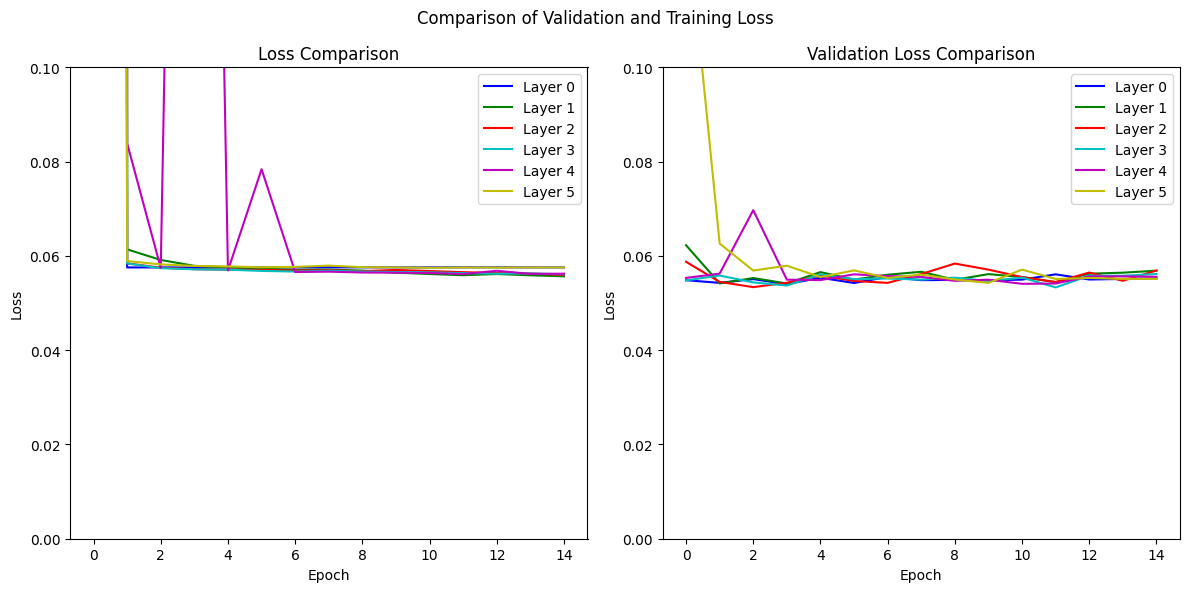

In [36]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.plot(history_0.history['loss'], label='Layer 0', color=colors[0])
ax1.plot(history_1.history['loss'], label='Layer 1', color=colors[1])
ax1.plot(history_2.history['loss'], label='Layer 2', color=colors[2])
ax1.plot(history_3.history['loss'], label='Layer 3', color=colors[3])
ax1.plot(history_4.history['loss'], label='Layer 4', color=colors[4])
ax1.plot(history_5.history['loss'], label='Layer 5', color=colors[5])
ax1.set_title('Loss Comparison')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()
ax2.plot(history_0.history['val_loss'], label='Layer 0', color=colors[0])
ax2.plot(history_1.history['val_loss'], label='Layer 1', color=colors[1])
ax2.plot(history_2.history['val_loss'], label='Layer 2', color=colors[2])
ax2.plot(history_3.history['val_loss'], label='Layer 3', color=colors[3])
ax2.plot(history_4.history['val_loss'], label='Layer 4', color=colors[4])
ax2.plot(history_5.history['val_loss'], label='Layer 5', color=colors[5])

ax1.set_title('Loss Comparison')
ax1.set_ylim(0,0.1)
ax2.set_ylim(0,0.1)
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax2.set_title('Validation Loss Comparison')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()
plt.suptitle('Comparison of Validation and Training Loss')
plt.tight_layout()
plt.savefig('loss & val.png',format='png')
plt.show()

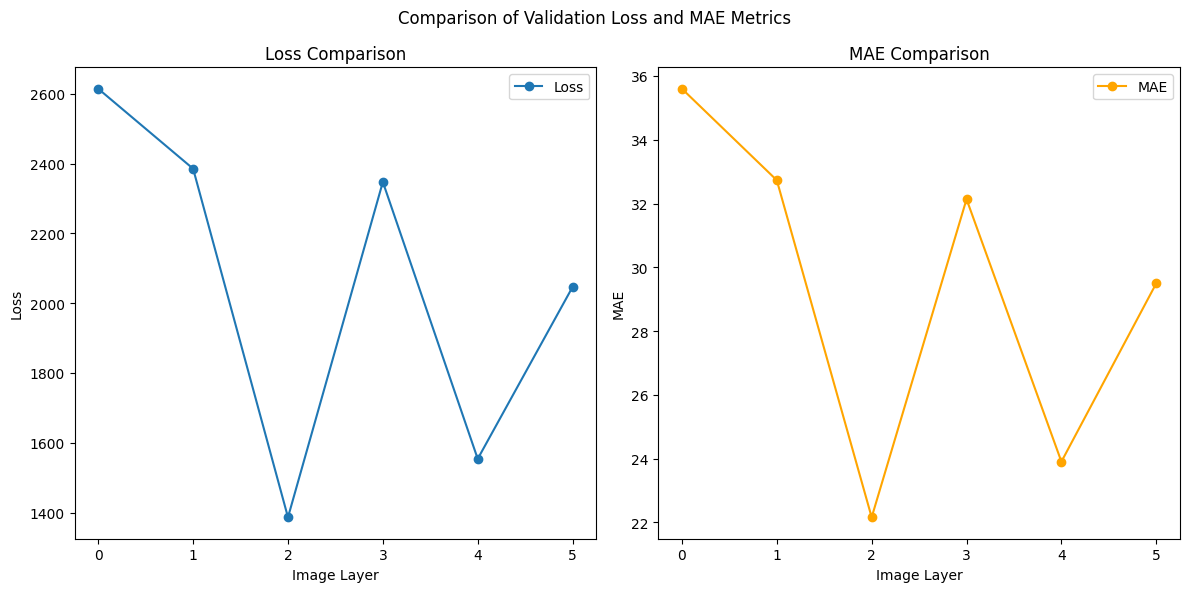

In [35]:
import matplotlib.pyplot as plt

# Assuming you have op_0 to op_5 arrays with loss and MAE values
# Replace these with your actual data

# Extract loss and MAE values
loss_values = [op[0] for op in [op_0, op_1, op_2, op_3, op_4, op_5]]
mae_values = [op[1] for op in [op_0, op_1, op_2, op_3, op_4, op_5]]

# Create subplots for loss and MAE
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot loss
ax1.plot(loss_values, marker='o', label='Loss')
ax1.set_title('Loss Comparison')
ax1.set_xlabel('Image Layer')
ax1.set_ylabel('Loss')
ax1.legend()

# Plot MAE
ax2.plot(mae_values, marker='o', color='orange', label='MAE')
ax2.set_title('MAE Comparison')
ax2.set_xlabel('Image Layer')
ax2.set_ylabel('MAE')
ax2.legend()
plt.suptitle('Comparison of Validation Loss and MAE Metrics')
plt.tight_layout()
plt.savefig('loss & mae val.png',format='png')
plt.show()



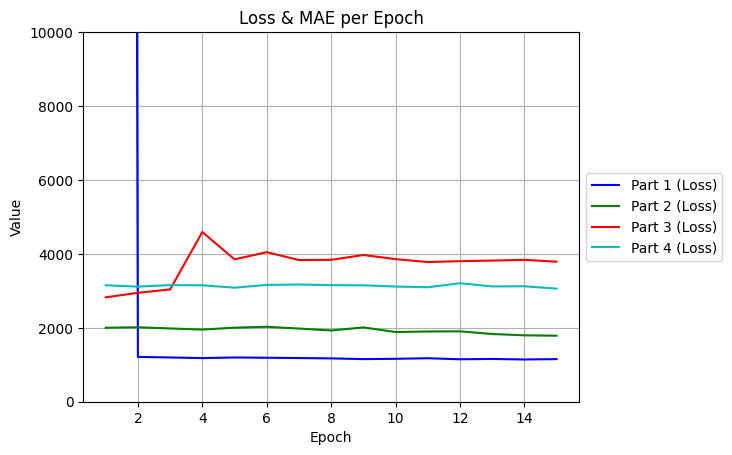

In [36]:
import matplotlib.pyplot as plt

colors = ['b', 'g', 'r', 'c', 'm', 'y','k','orange', 'purple', 'brown', 'pink', 'lime', 'teal', 'gray', 'olive', 'navy']

# Itera sobre cada full_history y grafica sus datos

for a in range(len(full_history_0)):
    # Extrae los valores de loss y mae de la full_history actual
    loss = full_history_0[a][0]
    mae = full_history_0[a][1]
    
    # Grafica los valores de loss
    plt.plot(range(1, len(loss) + 1), loss, label=str('Part ')+str(a+1) + ' (Loss)', color=colors[a])
    
    # Grafica los valores de mae
    #plt.plot(range(1, len(mae) + 1), mae, label=str('Part ')+str(a+1) + ' (MAE)', linestyle='dashed', color=colors[a])

# Agrega etiquetas al gráfico
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.ylim(0,10000)

plt.title('Loss & MAE per Epoch')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) # Coloca la leyenda fuera del gráfico
plt.grid(True)

# Muestra el gráfico
plt.show()


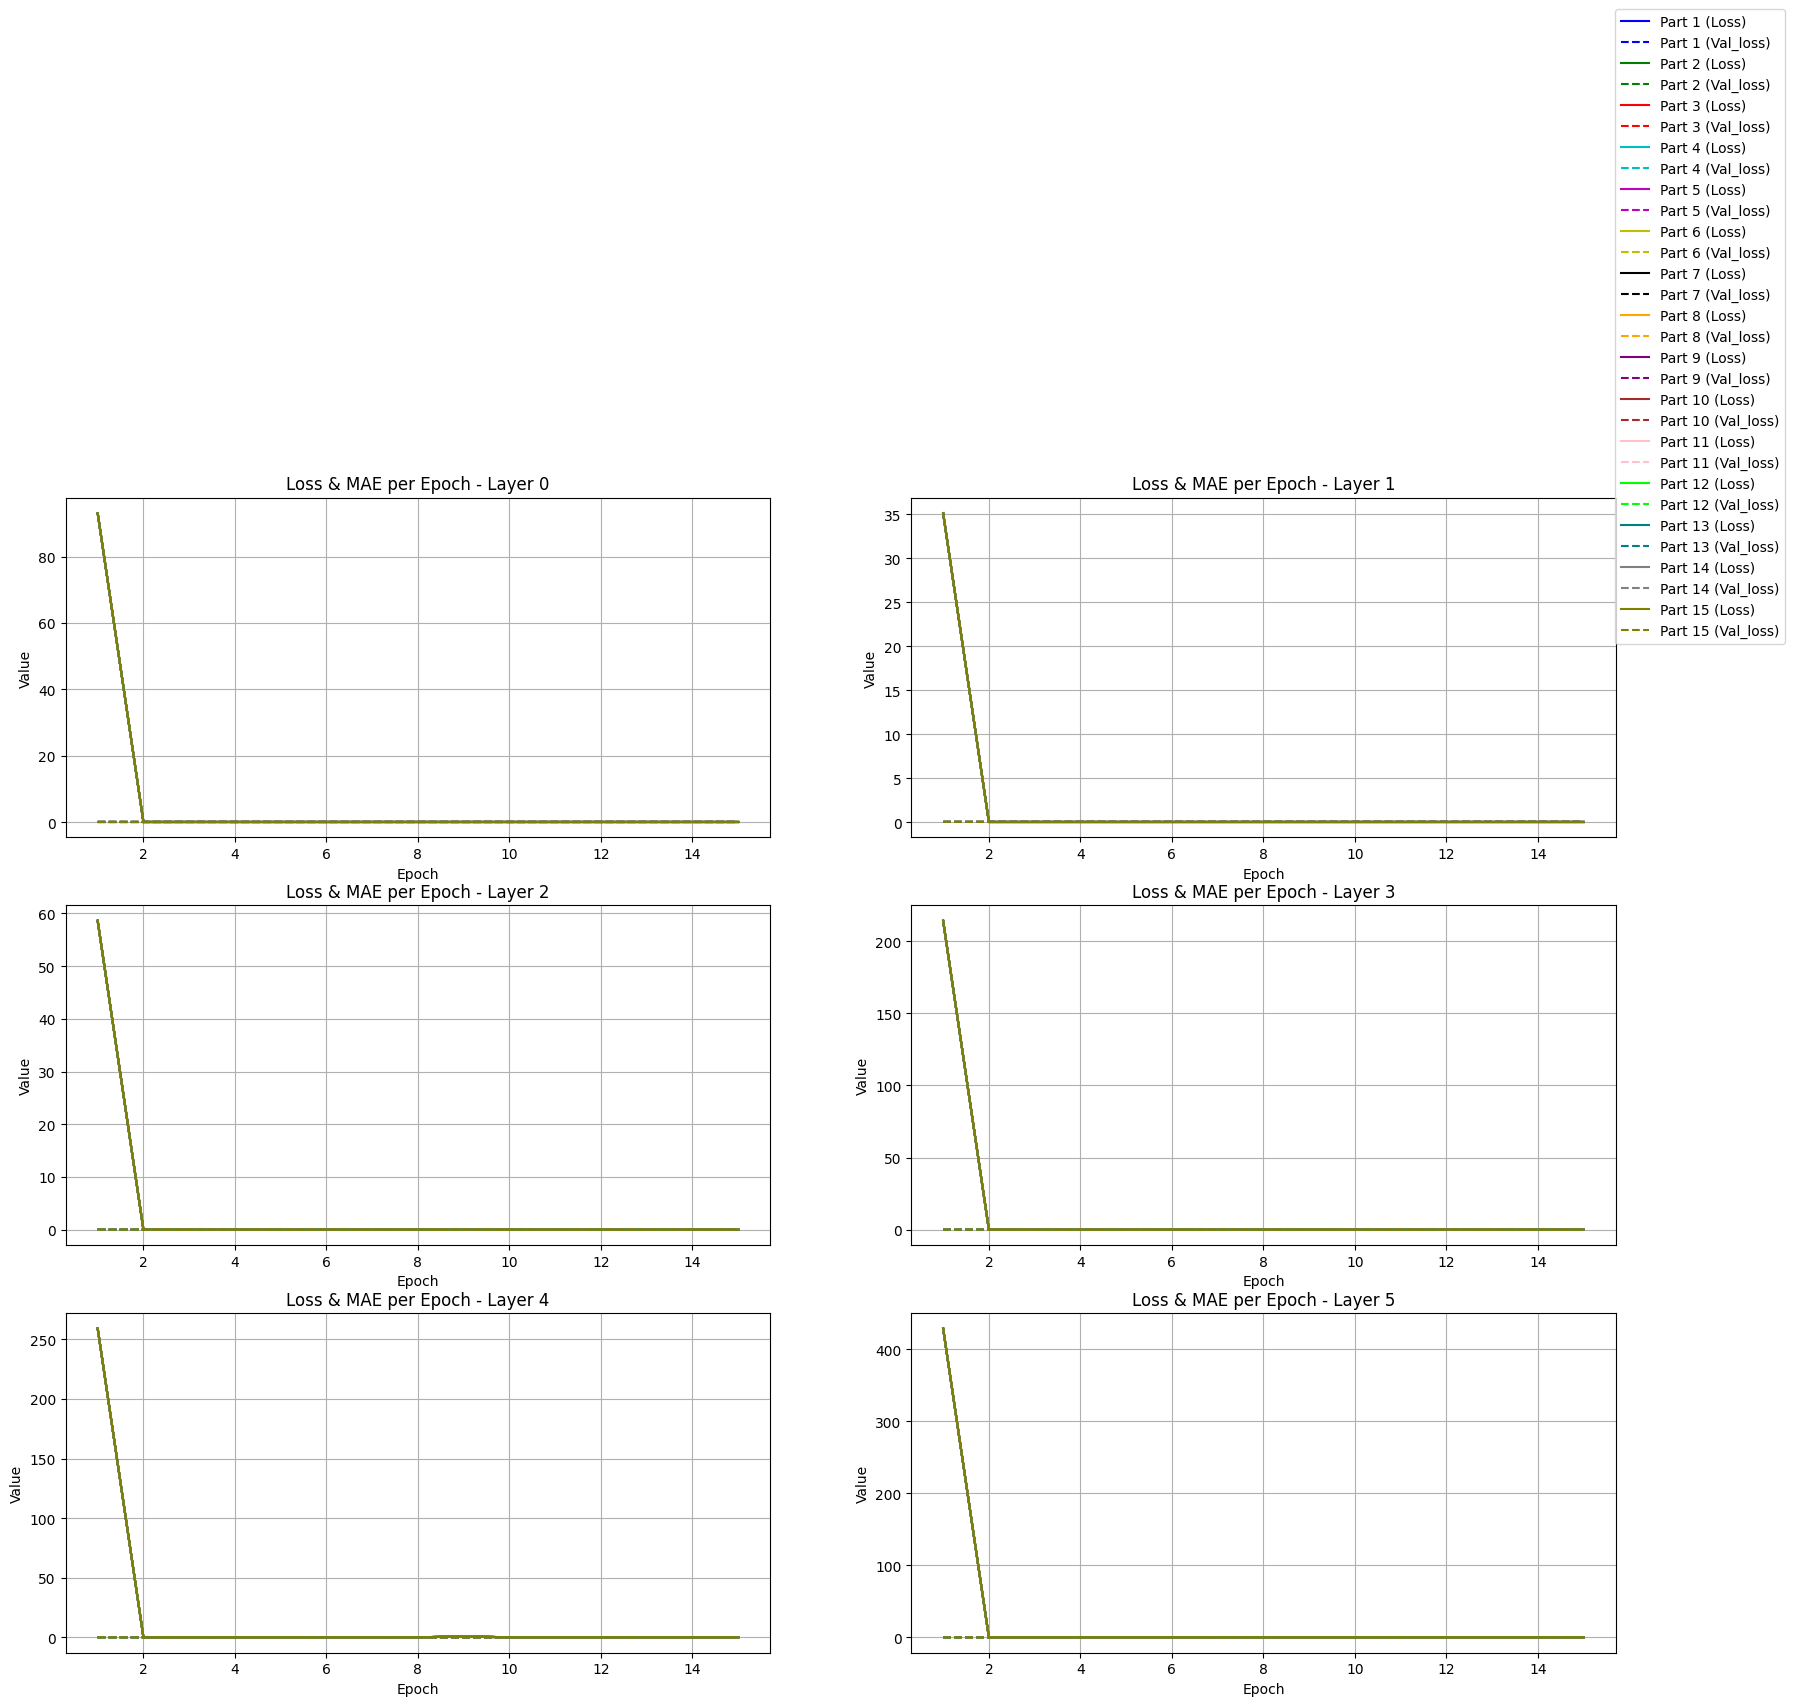

In [ ]:
num_filas = 3
num_columnas = 2
full_histories=[history_0,history_1,history_2,history_3,history_4,history_5]
# Crea la figura y los subplots
fig, axs = plt.subplots(num_filas, num_columnas, figsize=(20, 15))
for i in range(num_filas):
    for j in range(num_columnas):
        index = i * num_columnas + j
        if index < len(full_histories):
            for a in range(len(full_histories[i*2+j].history['loss'])):
                # Extrae los valores de loss y mae de la full_history actual
                loss = full_histories[i*2+j].history['loss']
                val_loss = full_histories[i*2+j].history['val_loss']
                
                # Grafica los valores de loss
                axs[i,j].plot(range(1, len(loss) + 1), loss, label=str('Part ')+str(a+1) + ' (Loss)', color=colors[a])
                
                # Grafica los valores de mae
                axs[i,j].plot(range(1, len(mae) + 1), mae, label=str('Part ')+str(a+1) + ' (Val_loss)', linestyle='dashed', color=colors[a])
                axs[i, j].set_xlabel('Epoch')
                axs[i, j].set_ylabel('Value')
                axs[i, j].set_title('Loss & MAE per Epoch - Layer {}'.format(index))
                
                axs[i, j].grid(True)
plt.legend(loc='lower right',bbox_to_anchor=(1.25,2.95))
            
plt.savefig('loss & val_loss layered.png',format='png')

# Muestra la figura
plt.show()

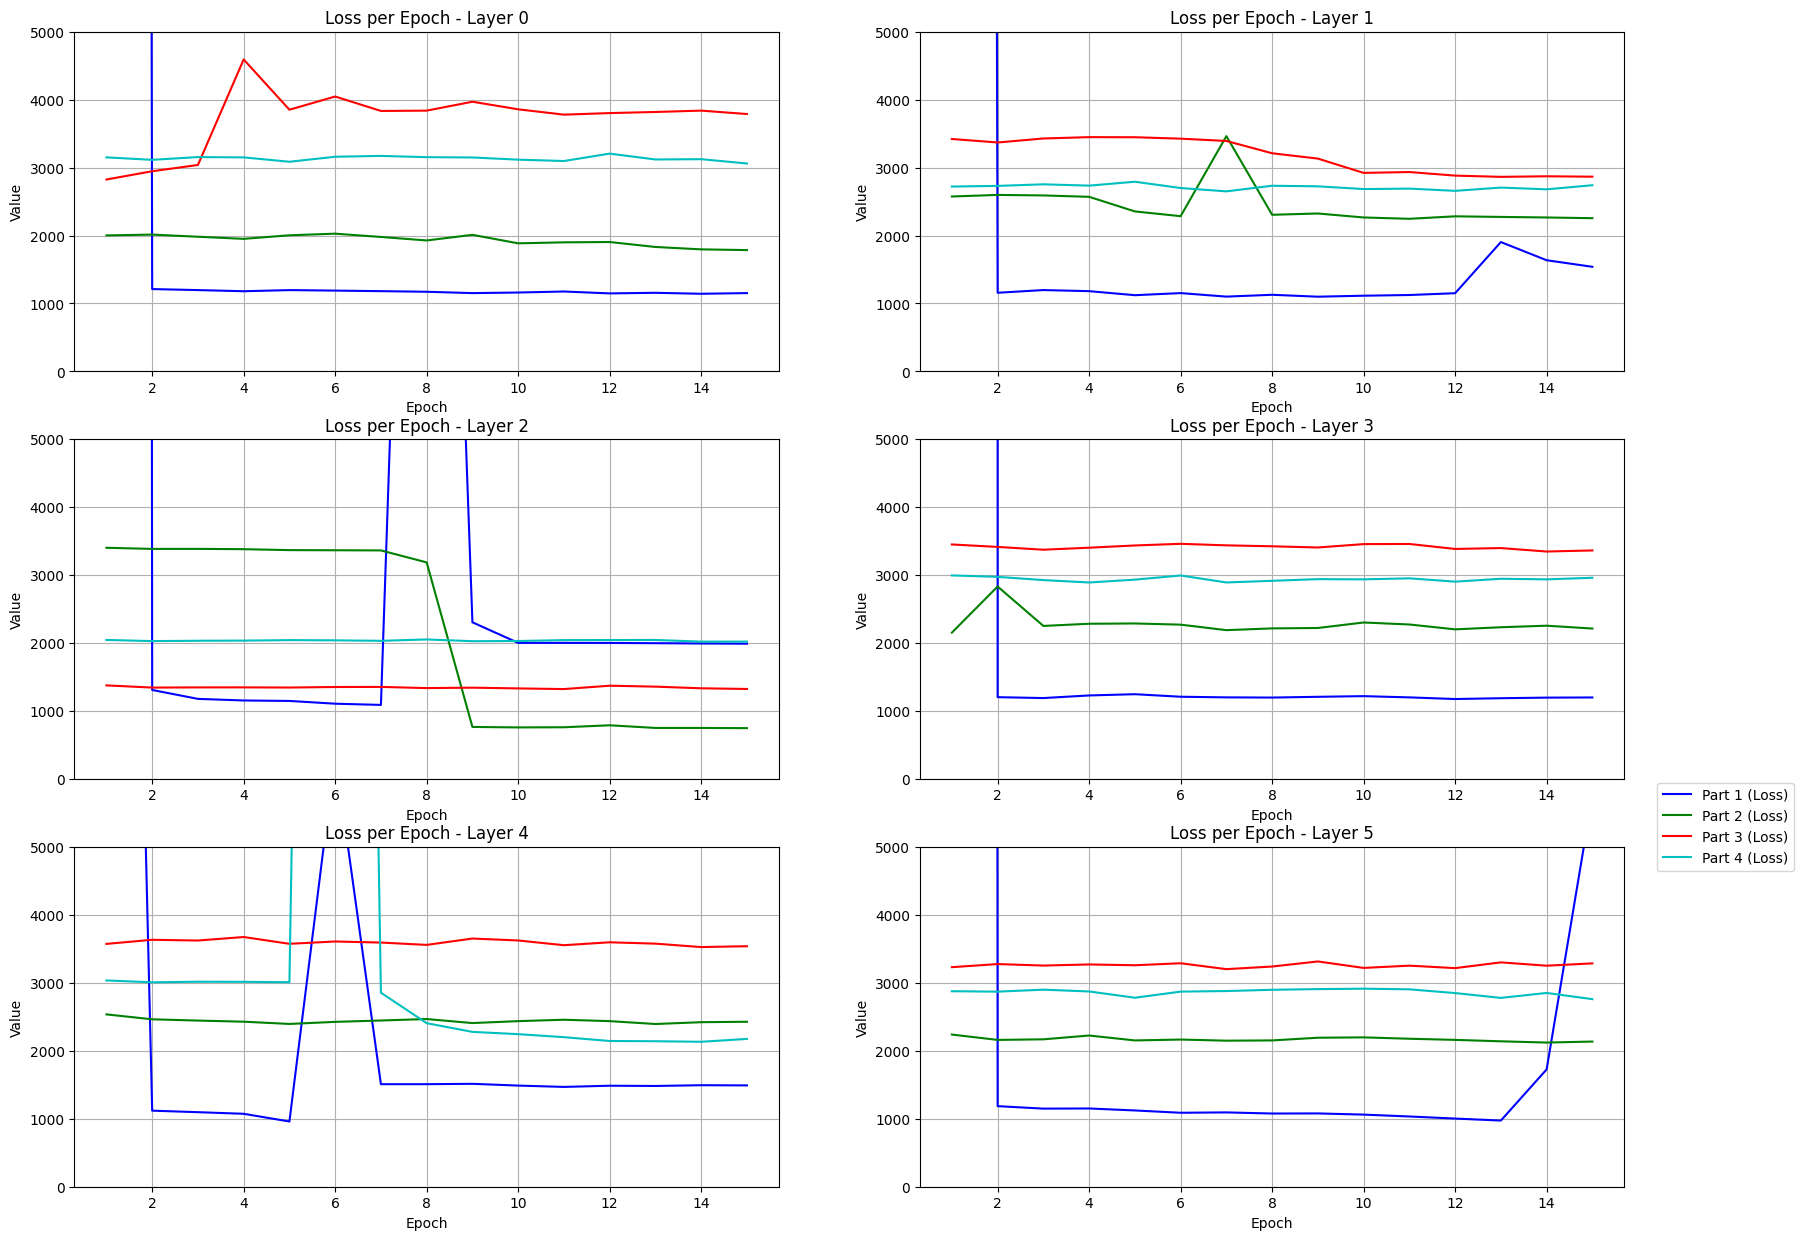

In [38]:
num_filas = 3
num_columnas = 2
full_histories=[full_history_0,full_history_1,full_history_2,full_history_3,full_history_4,full_history_5]
# Crea la figura y los subplots
fig, axs = plt.subplots(num_filas, num_columnas, figsize=(20, 15))
for i in range(num_filas):
    for j in range(num_columnas):
        index = i * num_columnas + j
        if index < len(full_histories):
            for a in range(len(full_histories[i*2+j])):
                # Extrae los valores de loss y mae de la full_history actual
                loss = full_histories[i*2+j][a][0]
                
                # Grafica los valores de loss
                axs[i,j].plot(range(1, len(loss) + 1), loss, label=str('Part ')+str(a+1) + ' (Loss)', color=colors[a])
                axs[i, j].set_xlabel('Epoch')
                axs[i, j].set_ylabel('Value')
                axs[i, j].set_ylim(0,5000)
                axs[i, j].set_title('Loss per Epoch - Layer {}'.format(index))
                
                axs[i, j].grid(True)
plt.legend(loc='lower right',bbox_to_anchor=(1.25,0.91))
            

plt.savefig('loss layered.png',format='png')
# Muestra la figura
plt.show()

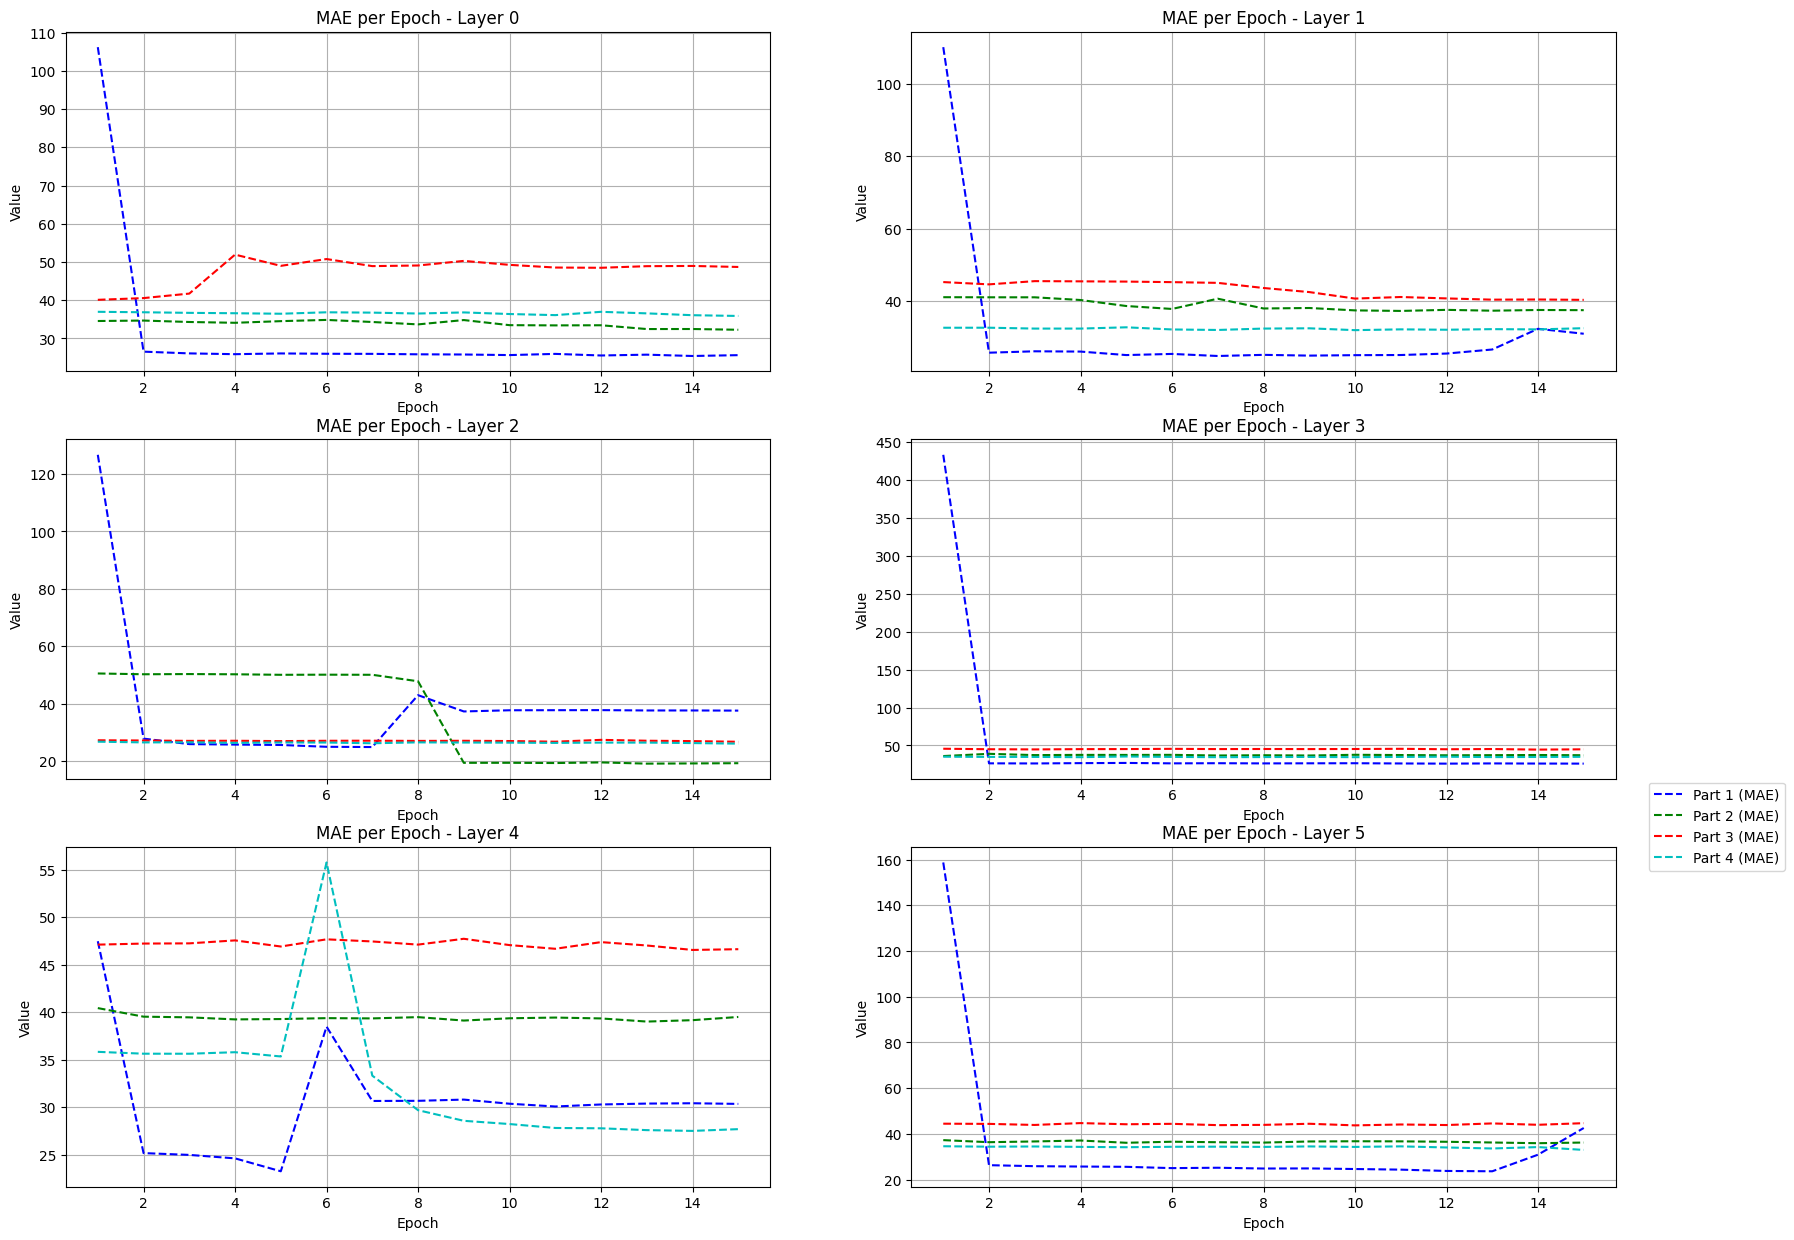

In [39]:
num_filas = 3
num_columnas = 2
full_histories=[full_history_0,full_history_1,full_history_2,full_history_3,full_history_4,full_history_5]
# Crea la figura y los subplots
fig, axs = plt.subplots(num_filas, num_columnas, figsize=(20, 15))
for i in range(num_filas):
    for j in range(num_columnas):
        index = i * num_columnas + j
        if index < len(full_histories):
            for a in range(len(full_histories[i*2+j])):
                # Extrae los valores de loss y mae de la full_history actual
                mae = full_histories[i*2+j][a][1]                
                # Grafica los valores de mae
                axs[i,j].plot(range(1, len(mae) + 1), mae, label=str('Part ')+str(a+1) + ' (MAE)', linestyle='dashed', color=colors[a])
                axs[i, j].set_xlabel('Epoch')
                axs[i, j].set_ylabel('Value')
                
                axs[i, j].set_title('MAE per Epoch - Layer {}'.format(index))
                
                axs[i, j].grid(True)
plt.legend(loc='lower right',bbox_to_anchor=(1.25,0.91))
            
plt.savefig('mae layered.png',format='png')

# Muestra la figura
plt.show()